# Worksheet 18

Name: Daniyal Ahmed
UID: U11469883

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

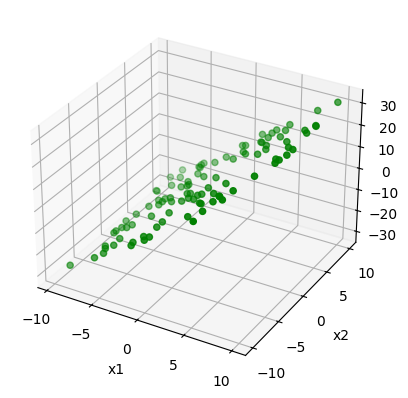

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

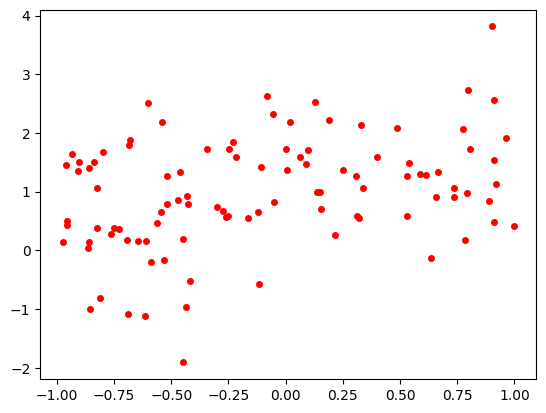

In [58]:
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , .5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

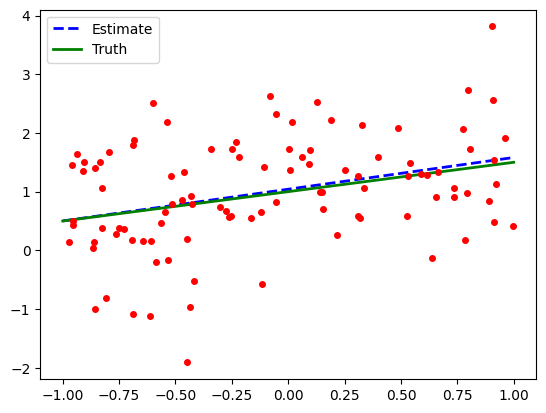

In [59]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

They intersect in the middle of the scatter plot, however even after they interset the distance between the two is miniscule

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

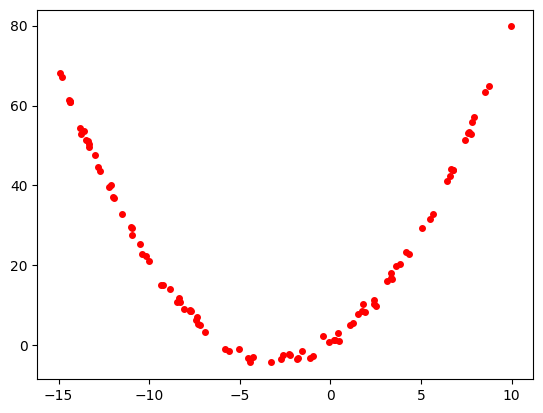

In [88]:
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, .5])
x = -15.0 + 25.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2]*(x**2) +np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

[1.00923444 2.99743002 0.50073223]


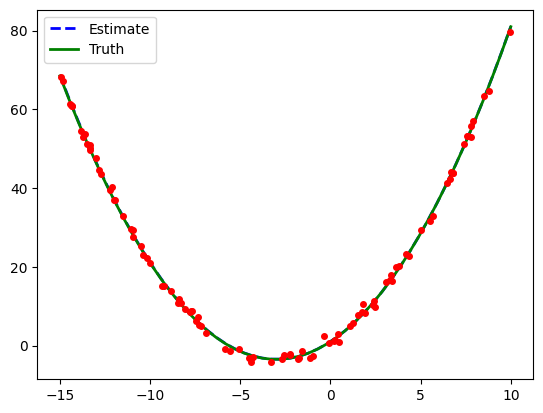

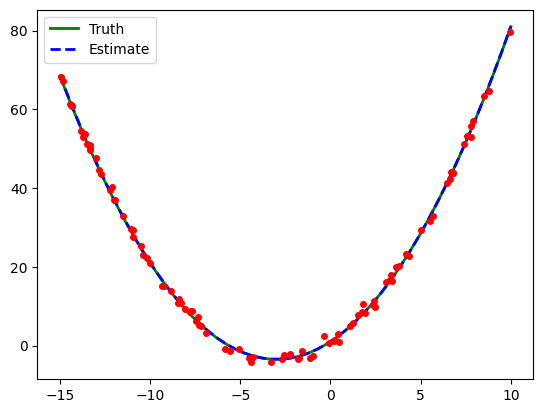

In [96]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y #least squares estimate
print(beta_hat)
x_plot = np.linspace(-15,10,50)
y_est = beta_hat[0] + beta_hat[1] * (x_plot) + beta_hat[2] * (x_plot**2)

#NOTE TO GRADER: THE ESTIMATE DOES APPEAR BUT BECAUSE THE EPSILON FACTOR IS SO TINY, IT'S HARD TO SEE THUS I PLOTED ANOTHER GRAH BELOW WHERE THE ESTIMATE IS MORE VISIBLE
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate', markersize=10)
plt.plot(x_plot, (true_beta[0] + true_beta[1] * x_plot + true_beta[2]*x_plot**2), lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

#BETTER VISUALIZATION
plt.plot(x_plot, (true_beta[0] + true_beta[1] * x_plot + true_beta[2]*x_plot**2), lw=2, c='g', label='Truth')
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The two have a very small difference, to the point were the graphing over laps, it generanl we know that the epslilon factor is only a few decimal points 

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

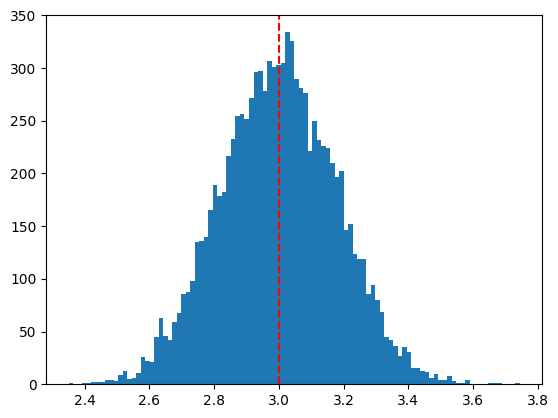

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1 , 3, .5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2]*x**2 +np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()

'''Comments: This looks like a normal distribution with a mean of 3, this makes sense since 
we are dealing with continous values '''